# Exploratory Data Analysis

Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read and examnine data

In [2]:
data = pd.read_csv(r'D:\PROJECTS\Adult Project\adultdata.csv',header=None)

Assign Column Names to data

In [3]:
data.columns = ['Age','Workclass','FnlWgt','Education','Education-Num','Marital Status','Occupation','Relationship',
                'Race','Sex','Capital-Gain','Capital-Loss','Hours-per-Week','Native Country',
                'Earning']

In [4]:
data.head(5)

,Age,Workclass,FnlWgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-per-Week,Native Country,Earning
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Drop two variables: FnlWgt, and Education-Num. 

In [5]:
data = data.drop(columns=['FnlWgt', 'Education-Num'])

In [6]:
#remove whitespace from beginning of string
def trim(x):
    if x.dtype == object:
        x = x.str.lstrip()
    return(x)

data = data.apply(trim)

In [7]:
#Replace ? with NA
data = data.replace(to_replace=r'?', value='NA')

In [8]:
data.shape

(32561, 13)

In [9]:
data.dtypes

Age                int64
Workclass         object
Education         object
Marital Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital-Gain       int64
Capital-Loss       int64
Hours-per-Week     int64
Native Country    object
Earning           object
dtype: object

In [10]:
agebins = [0,15,30,45,60,75,90]
data['AgeGroups'] = pd.cut(data['Age'], agebins,labels=['0-15', '15-30', '30-45','45-60','60-75','75-90'],right=True)
data = data.drop(columns=['Age'])

In [11]:
data.isnull().sum()

Workclass         0
Education         0
Marital Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital-Gain      0
Capital-Loss      0
Hours-per-Week    0
Native Country    0
Earning           0
AgeGroups         0
dtype: int64

# Value Counts for Categorical Problems

In [12]:
for col in data.columns:
    if data[col].dtype == 'object':
        print('\nColumn Name:', col,)
        print(data[col].value_counts())


Column Name: Workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
NA                   1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: Workclass, dtype: int64

Column Name: Education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: Education, dtype: int64

Column Name: Marital Status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: Marital Status, dtype: int64

Column Name: Occupation


In [13]:
data['AgeGroups'].value_counts()

30-45    12362
15-30    10572
45-60     7295
60-75     2091
75-90      241
0-15         0
Name: AgeGroups, dtype: int64

# 5 number summary for numerical problems

In [14]:
data.describe().round(2)

,Capital-Gain,Capital-Loss,Hours-per-Week
count,32561.00,32561.00,32561.00
mean,1077.65,87.30,40.44
std,7385.29,402.96,12.35
min,0.00,0.00,1.00
25%,0.00,0.00,40.00
50%,0.00,0.00,40.00
75%,0.00,0.00,45.00
max,99999.00,4356.00,99.00


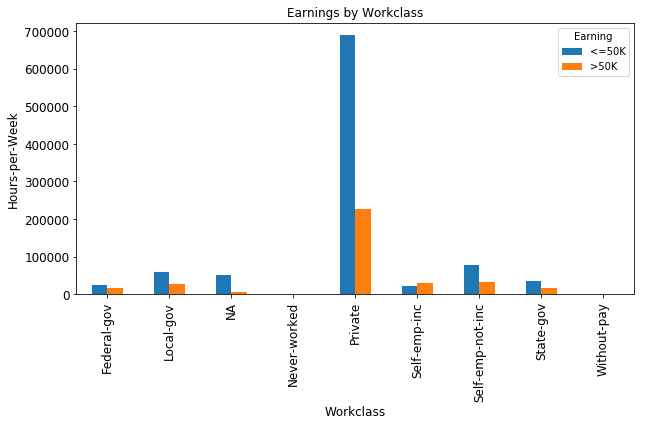

In [15]:
ax = data.groupby(['Workclass','Earning'])["Hours-per-Week"].sum().sort_values(ascending = False).unstack('Earning').plot(kind='bar', title ="Earnings by Workclass", figsize=(10, 5), legend=True, fontsize=12)
ax.set_xlabel("Workclass", fontsize=12)
ax.set_ylabel("Hours-per-Week", fontsize=12)
plt.show()

Private workers work for long hours and earn more than 50K.

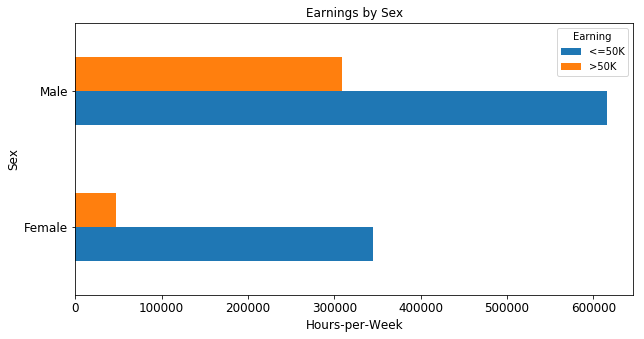

In [16]:
ax = data.groupby(['Earning','Sex'])["Hours-per-Week"].sum().sort_values().unstack('Earning').plot(kind='barh', title ="Earnings by Sex", figsize=(10, 5), legend=True, fontsize=12)
ax.set_xlabel("Hours-per-Week", fontsize=12)
ax.set_ylabel("Sex", fontsize=12)
plt.show()

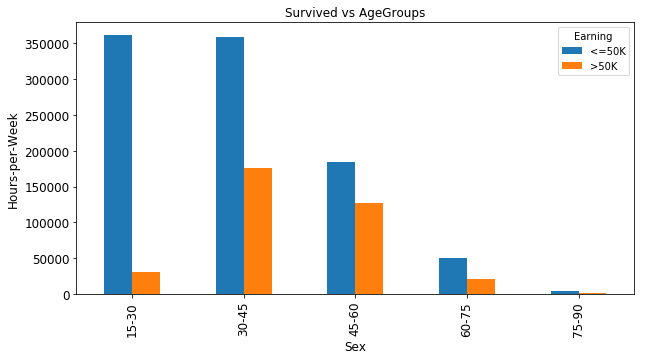

In [17]:
p = data.groupby(['Earning','AgeGroups'])["Hours-per-Week"].sum().unstack("Earning").plot(kind='bar', title ="Survived vs AgeGroups", figsize=(10, 5), legend=True, fontsize=12)
p.set_xlabel("Sex", fontsize=12)
p.set_ylabel("Hours-per-Week", fontsize=12)
plt.show()

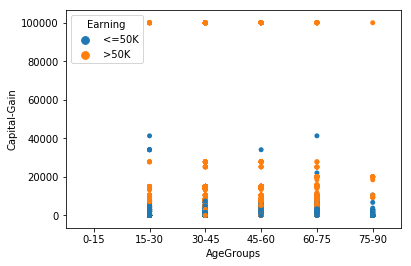

In [18]:
sns.stripplot(x="AgeGroups", y="Capital-Gain", hue = "Earning" ,data=data);

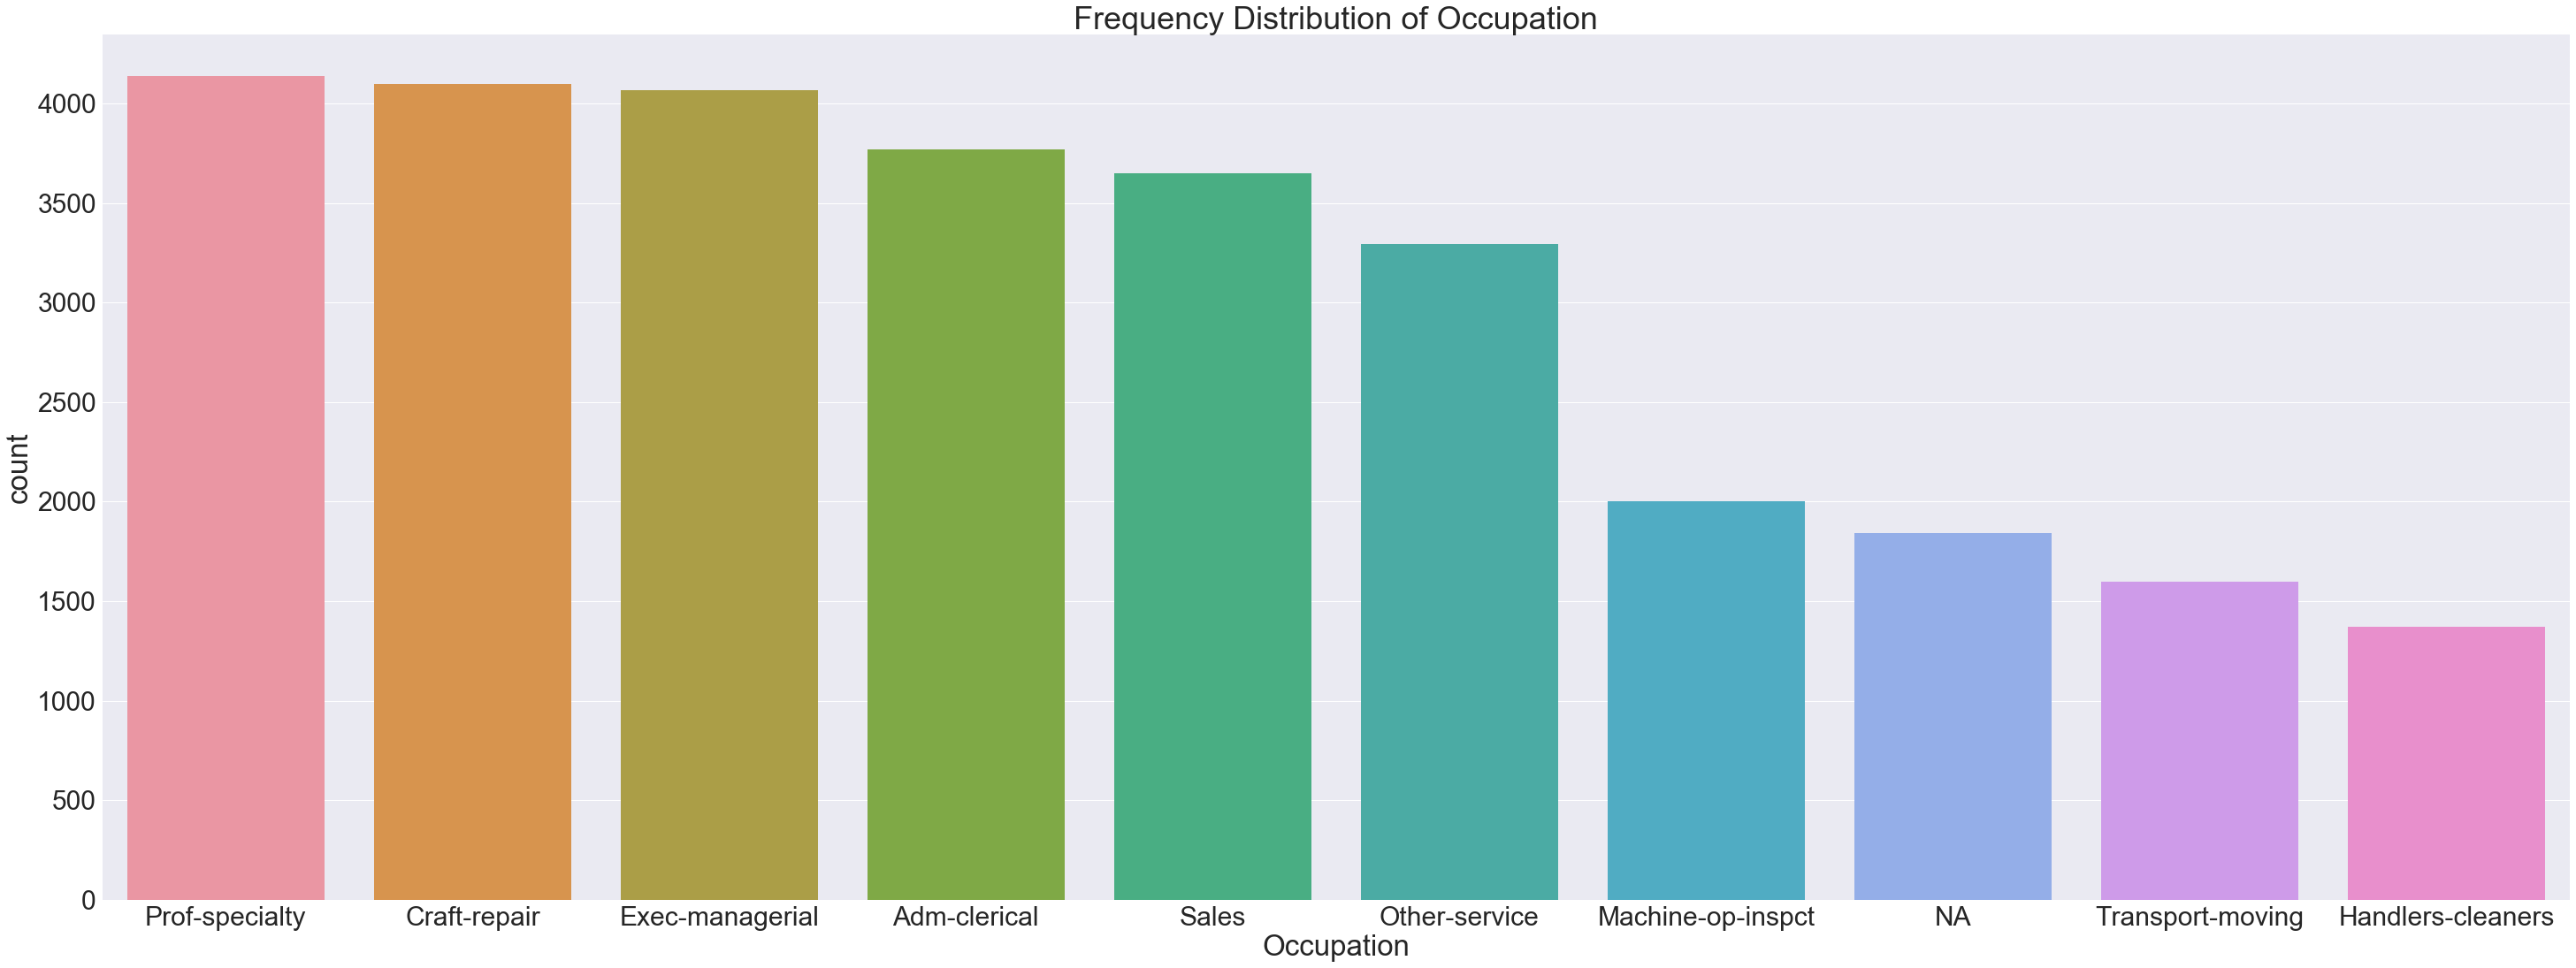

In [19]:
plt.figure(figsize=(50,18))
sns.set(font_scale=3)
sns.countplot(x="Occupation",data=data, order=data["Occupation"].value_counts().iloc[:10].index)
plt.title("Frequency Distribution of Occupation")
plt.show()

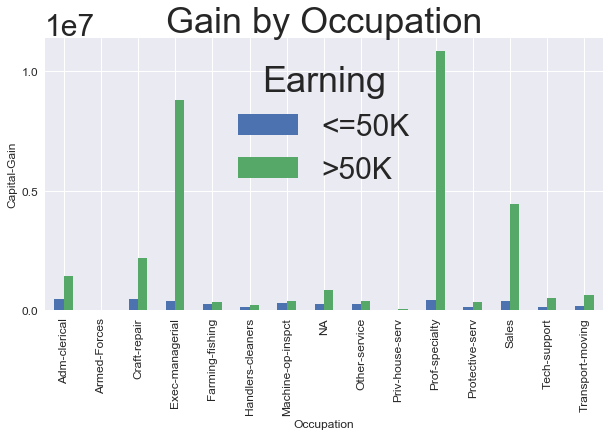

In [20]:
p = data.groupby(['Earning','Occupation'])["Capital-Gain"].sum().unstack("Earning").plot(kind='bar', title ="Gain by Occupation", figsize=(10, 5), legend=True, fontsize=12)
p.set_xlabel("Occupation", fontsize=12)
p.set_ylabel("Capital-Gain", fontsize=12)
plt.show()

# Model Preparation

Label Encoding of Categorical Variables

In [21]:
df = data.iloc[:,[0,1,2,3,4,5,6,10,12]]

In [22]:
df.head(5)

,Workclass,Education,Marital Status,Occupation,Relationship,Race,Sex,Native Country,AgeGroups
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,30-45
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,45-60
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,30-45
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,45-60
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,15-30


In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df = df.apply(LabelEncoder().fit_transform)

In [24]:
df.head(5)

,Workclass,Education,Marital Status,Occupation,Relationship,Race,Sex,Native Country,AgeGroups
0,7,9,4,0,1,4,1,39,1
1,6,9,2,3,0,4,1,39,2
2,4,11,0,5,1,4,1,39,1
3,4,1,2,5,0,2,1,39,2
4,4,9,2,10,5,2,0,4,0


One-Hot Encoding the Target Variable

In [25]:
one_hot = pd.get_dummies(data['Earning'])
df = df.join(one_hot)
# Avoid dummy variable trap
df = df.drop('>50K', axis = 1)
# Join the encoded df
dfn = data.iloc[:,[7,8,9]]
#Join entire df together
df = df.join(dfn)

In [26]:
#Split dataset into train and test
X = df.iloc[:, df.columns != '<=50K'].values
y = df.iloc[:,9].values

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=0)

# Classification Models

We will use 10-fold cross validation to estimate accuracy.
This will split our dataset into 10 parts, train on 9 and test on 1 and repeat for all combinations of train-test splits.

In [28]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

In [29]:
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [30]:
# Evaluate 6 different classification Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decn Tree', DecisionTreeClassifier()))
models.append(('Rndm Forest', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.803286 (0.006719)
KNN: 0.842137 (0.007968)
Decn Tree: 0.824401 (0.007472)
Rndm Forest: 0.847166 (0.007162)
NB: 0.797067 (0.006241)
SVM: 0.831579 (0.007657)


# compare the spread and the mean accuracy of each model

In [31]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

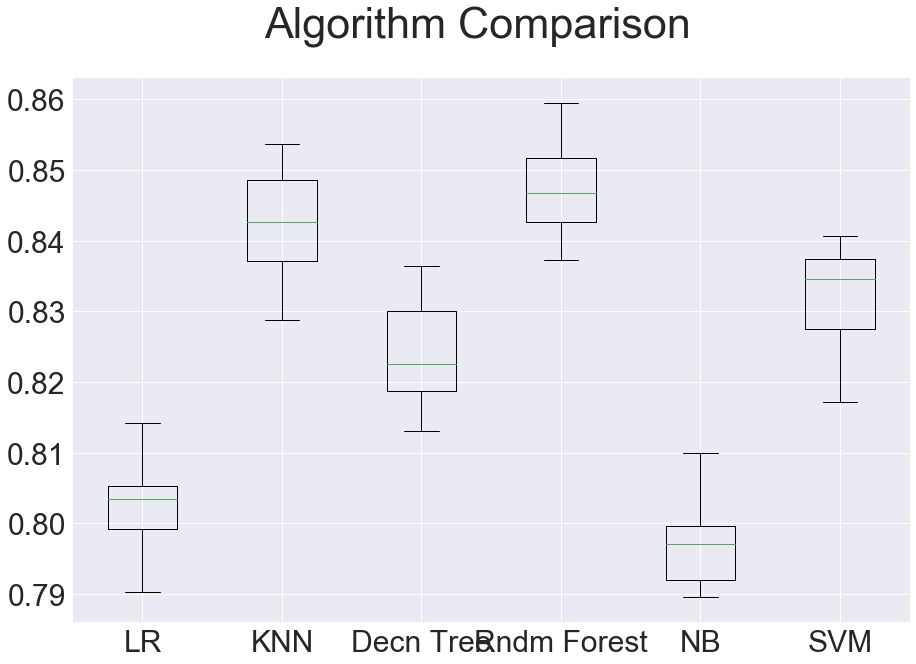

In [32]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Select best model and run on test data

In [33]:
# Make predictions on validation dataset
classifier =  RandomForestClassifier(n_estimators=10, criterion='entropy',random_state=0)
classifier.fit(X_train,y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
#predictions = classifier.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8435436818670352
[[1024  571]
 [ 448 4470]]
             precision    recall  f1-score   support

          0       0.70      0.64      0.67      1595
          1       0.89      0.91      0.90      4918

avg / total       0.84      0.84      0.84      6513



Precision Score - Accuracy of positive predictions. <br>
Recall - Fraction of positives That were correctly identified.<br>
f1 score - measure of a model’s performance. It is a weighted average of the precision and recall of a model, with results tending to 1 being the best, and those tending to 0 being the worst. <br>
Support - Support is the number of actual occurrences of the class in the specified dataset.<br>